[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.3%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%20%EB%B6%84%EC%84%9D-input.ipynb)

## 업종/테마주 분석

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?
* 아래 실습결과에 다른 테마를 적용해 보면 같은 방식으로 여러 테마를 분석해 보실 수 있습니다.



## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 시각화를 위한 한글폰트 설정

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()
font_family

'Malgun Gothic'

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [7]:
# 그래프 스타일 설정
# plt.style.use("fivethirtyeight")
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글 폰트'}>

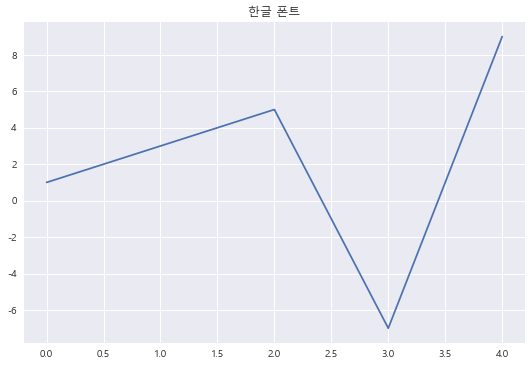

In [8]:
# colab에서 한글폰트를 설정했음에도 폰트가 깨진다면 런타임 재시작 후 코드를 처음부터 다시 실행해 주세요!
pd.Series([1, 3, 5, -7, 9]).plot(title="한글 폰트")

## 데이터 로드

In [10]:
# 전체 컬럼이 출력되도록 display 설정을 변경합니다.
pd.options.display.max_columns = None

In [158]:
# 테마주 수집시에 저장해 두었던 csv 파일을 다시 로드합니다.
# 'upjong_no_35_2021-01-09_ver2.csv'
# 종목코드는 object 형태로 불러옵니다.
file_name = "upjong_no_261_2022-07-12_ver2.csv"
df = pd.read_csv(file_name, dtype={"종목코드":object})
df.shape

(158, 42)

## 데이터 미리보기

In [14]:
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드,매출액,영업이익,당기순이익,영업이익률,순이익률,상장주식수,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),동일업종 PER,동일업종 등락률,코스피/코스닥,시가총액(억원),시가총액순위(전처리),52주최고,52주최저,52주차액,52주차액비율,현재-최고가,현재/최고가비율,목표주가,투자의견,매수매도,PBR,PPS,BPS,PER(배),EPS(원),PBR(배),BPS(원),배당수익률(%)
0,카이노스메드 *,11450.0,1520.0,+15.31%,9610.0,9930.0,125641.0,1413.0,0.0,2022-07-12,284620,NaN,NaN,NaN,NaN,NaN,22322396,22322396,828098,3.71%,106.06,+0.27%,코스닥,2219,362,21510,8629,12881,2.492757,-10060.0,0.532311,NaN,NaN,NaN,125.82배,79원,79원,NaN,-770.0,125.82,79.0,NaN
1,일동제약,38350.0,2900.0,+8.18%,36600.0,36650.0,1291093.0,49785.0,6060869.0,2022-07-12,249420,1530.0,-60.0,-210.0,-3.92,-13.73,26803285,26803285,1088414,4.06%,106.06,+0.29%,코스피,1949,200,79500,12400,67100,6.411290,-41150.0,0.482390,50000.0,4.0,매수,5.47배,"7,471원","7,471원",NaN,-8637.0,5.47,7471.0,NaN
2,이글벳 *,6640.0,470.0,+7.62%,6050.0,6150.0,362894.0,2395.0,31238.0,2022-07-12,044960,NaN,NaN,NaN,NaN,NaN,12641883,12641883,139638,1.10%,106.06,+0.27%,코스닥,803,996,9700,5600,4100,1.732143,-3060.0,0.684536,NaN,NaN,NaN,1.87배,"3,391원","3,391원",21.03,302.0,1.87,3391.0,0.79
3,애드바이오텍 *,5000.0,230.0,+4.82%,4715.0,4950.0,18666.0,91.0,54126.0,2022-07-12,179530,NaN,NaN,NaN,NaN,NaN,9140444,9140444,270546,2.96%,106.06,+0.29%,코스닥,448,1357,11400,4485,6915,2.541806,-6400.0,0.438596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-347.0,3.20,1530.0,NaN
4,신풍제약우,48600.0,1600.0,+3.40%,48650.0,48700.0,2085.0,101.0,29385.0,2022-07-12,019175,NaN,NaN,NaN,NaN,NaN,2200000,2200000,8518,0.39%,106.06,+0.27%,코스피,1032,794,135000,30950,104050,4.361874,-86400.0,0.360000,NaN,NaN,NaN,6.91배,"6,792원","6,792원",NaN,-333.0,6.91,6792.0,NaN


In [15]:
df.tail()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드,매출액,영업이익,당기순이익,영업이익률,순이익률,상장주식수,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),동일업종 PER,동일업종 등락률,코스피/코스닥,시가총액(억원),시가총액순위(전처리),52주최고,52주최저,52주차액,52주차액비율,현재-최고가,현재/최고가비율,목표주가,투자의견,매수매도,PBR,PPS,BPS,PER(배),EPS(원),PBR(배),BPS(원),배당수익률(%)
153,우진비앤지 *,2095.0,65.0,-3.01%,2140.0,2155.0,53924.0,113.0,709327.0,2022-07-12,018620,NaN,NaN,NaN,NaN,NaN,28889293,28889293,459900,1.59%,106.06,+0.22%,코스닥,611,1189,3515,1760,1755,1.997159,-1420.0,0.596017,NaN,NaN,NaN,1.99배,"1,062원","1,062원",NaN,-29.0,1.99,1062.0,NaN
154,HLB테라퓨틱스 *,12400.0,400.0,-3.12%,12750.0,12800.0,64406.0,799.0,499045.0,2022-07-12,115450,NaN,NaN,NaN,NaN,NaN,31335211,31335211,1545014,4.93%,106.06,+0.22%,코스닥,4042,158,19300,7450,11850,2.590604,-6900.0,0.642487,NaN,NaN,NaN,3.36배,"3,845원","3,845원",NaN,-582.0,3.36,3845.0,NaN
155,더블유에스아이 *,1975.0,65.0,-3.19%,2015.0,2040.0,2316.0,5.0,36240.0,2022-07-12,299170,NaN,NaN,NaN,NaN,NaN,30027963,30027963,87168,0.29%,106.06,+0.26%,코스닥,595,1206,3470,1675,1795,2.071642,-1495.0,0.569164,NaN,NaN,NaN,1.74배,"1,137원","1,137원",8.57,231.0,1.74,1137.0,NaN
156,엔지켐생명과학 *,17700.0,650.0,-3.54%,17950.0,18250.0,9839.0,176.0,134865.0,2022-07-12,183490,NaN,NaN,NaN,NaN,NaN,13933768,13933768,1482469,10.64%,106.06,+0.22%,코스닥,2494,306,92426,14850,77576,6.223973,-74726.0,0.191505,NaN,NaN,NaN,1.14배,"15,762원","15,762원",NaN,-2408.0,1.14,15762.0,NaN
157,HLB제약 *,14500.0,650.0,-4.29%,14750.0,14800.0,66838.0,979.0,557586.0,2022-07-12,047920,NaN,NaN,NaN,NaN,NaN,27564264,27564264,132391,0.48%,106.06,+0.22%,코스닥,4107,154,30200,7860,22340,3.842239,-15700.0,0.480132,NaN,NaN,NaN,5.08배,"2,932원","2,932원",NaN,-550.0,5.08,2932.0,NaN


In [16]:
# info 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   종목명          158 non-null    object 
 1   현재가          158 non-null    float64
 2   전일비          158 non-null    float64
 3   등락률          158 non-null    object 
 4   매수호가         158 non-null    float64
 5   매도호가         158 non-null    float64
 6   거래량          158 non-null    float64
 7   거래대금         158 non-null    float64
 8   전일거래량        158 non-null    float64
 9   조회일자         158 non-null    object 
 10  종목코드         158 non-null    object 
 11  매출액          34 non-null     float64
 12  영업이익         33 non-null     float64
 13  당기순이익        28 non-null     float64
 14  영업이익률        33 non-null     float64
 15  순이익률         28 non-null     float64
 16  상장주식수        158 non-null    int64  
 17  외국인한도주식수(A)  158 non-null    int64  
 18  외국인보유주식수(B)  158 non-null    int64  
 19  외국인소진율(B

## 천단위 숫자 구분 함수 만들기

In [17]:
def format_number(num):
    """
    천단위 숫자를 구분해 주는 문자를 넣어주는 함수
    float 타입은 소숫점 2자리까지만 반환
    """
    if type(num) != str:
        return format(num, ",")
    else:
        return num

In [25]:
# format 을 통해 천단위 쉼표 만들기
format(1234567890, ",")

'1,234,567,890'

In [26]:
# format_number 함수가 잘 동작하는지 확인하기
format_number(12345678.90123)

'12,345,678.90123'

In [27]:
# format_number 함수가 잘 동작하는지 확인하기
format_number('1234556')

'1234556'

In [28]:
format_number("abacde")

'abacde'

In [31]:
# "상장주식수", "거래량" 의 타입 보기
df[["상장주식수", "거래량"]].dtypes

상장주식수      int64
거래량      float64
dtype: object

In [37]:
# "상장주식수", "거래량" 데이터에 format_number 를 적용해 봅니다.
df[["종목코드", "상장주식수", "거래량"]].head().style.format(format_number)

,종목코드,상장주식수,거래량
0,284620,"22,322,396","125,641.0"
1,249420,"26,803,285","1,291,093.0"
2,044960,"12,641,883","362,894.0"
3,179530,"9,140,444","18,666.0"
4,019175,"2,200,000","2,085.0"


## EPS(원)

* _x 와 _y로 변수명이 생성된 이유는 기업실적 분석에 있는 EPS(원)과 투자정보에 있는 EPS(원)이 합쳐졌기 때문입니다.
* _x : 기업실적 분석의 최근분기실적에서 가져온 데이터
* _y : 투자정보에서 가져온 데이터


* `EPS(Earning Per Share) = 순이익(당기순이익) / 그 기업이 발행한 총 주식수`
* 주당순이익(EPS)는 기업이 1주당 얼마의 순이익을 냈는가를 나타내는 지표이다. 예를 들어 발행주식이 10,000개인 기업이 순이익 1,000원을 냈다면 주당순이익은 0.1이 된다. EPS는 주로 PER을 계산하기 위한 값으로 이용되며 단독으로는 별로 사용되지 않는다.
* 주가 10,000원짜리 기업이 순이익 1,000원을 냈다고 해도, 발행한 주식의 수를 알 수 없으므로 주당 순이익이 0.1이라고 단정지어서는 안된다. 또한 발행한 주식의 수가 달라질 수도 있으므로, 얼마든지 0.1이라는 수치는 변할 수 있다는 점도 간과해서는 아니된다.
* 출처 : https://ko.wikipedia.org/wiki/%EC%A3%BC%EB%8B%B9%EC%88%9C%EC%9D%B4%EC%9D%B5

In [39]:
# "EPS(원)_x"가 결측치가 아니고 "EPS(원)_y" 가 결측치라면 "EPS(원)_x" 로 _y의 결측치를 채우도록 합니다.
# df["EPS(원)"]
df.filter(regex="EPS", axis=1)

,EPS(원)
0,-770.0
1,-8637.0
2,302.0
3,-347.0
4,-333.0
...,...
153,-29.0
154,-582.0
155,231.0
156,-2408.0


In [47]:
# 사용하지 않는 컬럼은 삭제합니다.
# df.head().filter(regex="EPS")
# df[df["EPS(원)"].isnull()]

## PER(배) 
* _x 와 _y로 변수명이 생성된 이유는 기업실적 분석에 있는 PER(배) 와 투자정보에 있는 PER(배)가 합쳐졌기 때문입니다.
* _x : 기업실적 분석의 최근분기실적에서 가져온 데이터
* _y : 투자정보에서 가져온 데이터


* `PER(Price Earnings Ratio)`
* 주가수익률은 주가를 1주당 순이익 (EPS)으로 나눈 값이다. 예를 들어 주가 10,000 원짜리 기업이 주당 1,000 원의 순익을 거뒀다면 PER은 10배가 된다. 주가 5,000 원짜리 기업이 주당 1,000 원의 순익을 거뒀다면 PER은 5배가 된다. 즉 두 기업은 이익은 같은데도 전자의 기업은 주가가 두배로 평가되어 있는 셈이다.

* PER는 당기순이익 크기에 관계없이 주식가치의 기업간, 기간간 비교를 가능하게 한다. **일반적으로 PER가 낮으면 이익에 비해 주가가 저평가된 종목으로, 높으면 고평가된 종목으로 간주된다. 따라서 가치투자에서는 PER가 낮은 종목을 매수하여 보유하는 방법이 자주 언급된다.**

* 급격한 성장이 예상되는 혁신기업의 주식가치 판단에도 PER가 정확한 기준인가는 부정적인 의견이 많다. PER는 현재의 회계적 이익만을 기준으로 미래가치가 반영된 주식가치를 평가하기 때문이다. `성장이 안정기에 접어든 기업은 PER가 유용할 순 있어도, 급격한 성장이 예상되는 기업의 경우에는 PER가 미래 주식가치를 온전히 반영할 수가 없다.`

* 특히, 성장이 빠른 업종에서 수익성보다 매출 성장이 중시되는 상황에서는 이익보다 매출이 더 중요한 기준이 되므로 PER은 유용하지 못한 지표가 된다. 예를 들어 앞의 예에서 PER 10배인 기업은 PER 5배인 기업과 순이익은 같지만 매출이 훨씬 크거나 시장점유율이 빨리 성장하기 때문에 주가가 더 고평가되어 있는 것일 수도 있다. 즉 미래의 가치는 주가에 선반영되어 있기 때문에, PER만을 투자에 활용하는 것은 좋지 못하다.

* 출처 https://ko.wikipedia.org/wiki/%EC%A3%BC%EA%B0%80%EC%88%98%EC%9D%B5%EB%A5%A0

In [49]:
# "PER(배)_x"가 결측치가 아니고 "PER(배)_y" 가 결측치라면 "PER(배)_x" 로 _y의 결측치를 채우도록 합니다.
# df["PER(배)"]
df.filter(regex="PER")

,동일업종 PER,PER(배)
0,106.06,NaN
1,106.06,NaN
2,106.06,21.03
3,106.06,NaN
4,106.06,NaN
...,...,...
153,106.06,NaN
154,106.06,NaN
155,106.06,8.57
156,106.06,NaN


In [48]:
df["PER(배)"]

0        NaN
1        NaN
2      21.03
3        NaN
4        NaN
       ...  
153      NaN
154      NaN
155     8.57
156      NaN
157      NaN
Name: PER(배), Length: 158, dtype: float64

## BPS(원)

* _x 와 _y로 변수명이 생성된 이유는 기업실적 분석에 있는 BPS(원)과 투자정보에 있는 BPS(원)이 합쳐졌기 때문입니다.
* _x : 기업실적 분석의 최근분기실적에서 가져온 데이터
* _y : 투자정보에서 가져온 데이터


* `주당순자산가치(BPS, Book-value Per Share)는 기업의 순자산을 발행 주식수로 나눈 것`

* 주당순자산가치는, '청산가치' 라고도 불린다. 그 이유는 현재 시점에서 기업의 활동을 중단시키고 그 부를 모든 주주들에게 나눠줄 경우 한주당 얼마씩이 돌아가는가를 나타내는 수치이기 때문이다. 보통 주당순자산가치라는 말은 잘 쓰지 않고 BPS라고 하므로 이하 BPS로 쓴다.
* 기업의 총자산에서 부채를 빼면 자기자본이 나온다. 어림셈법으로, 이것을 순자산으로 보고 총 발행주식수로 나누어서 BPS를 산출하는 방법도 있다. 예를 들어 회사에 순자산이 1억이 있고, 총 발행된 주식이 1만장 있다면 주당순자산은 1만원이 된다.

* 주당순자산을 좀더 보수적으로 계산하려면, 여기서 상표권, 영업권 등의 무형고정자산과 배당금, 임원상여금 등 사외유출분을 뺀 것을 순자산으로 본다. 이것을 총 발행주식수로 나누면 BPS가 나온다.

* 예를 들어 회사에 전체 자산이 2억 2천만 원이 있고, 이중 부채가 1억, 무형고정자산과 배당금, 상여금 등으로 나가야 할 돈이 총 2천만 원이라면 순자산은 1억원이 된다. 여기에 총 발행 주식이 1만장이라면 BPS는 1만 원이 된다. 즉 이 회사를 지금 당장 폐업시키고 자산을 모두 처분하여 주주 배당금과 상여금 등으로 쓸 돈을 제외하고 나머지를 모두 주주들에게 돌려준다면, 주주들은 한주당 1만 원씩을 받게 된다.

* BPS가 높다는 것은 자기자본의 비중이 크거나 회사 가치가 높다는 것을 나타낸다. BPS에는 주가 정보가 고려되어 있지 않으므로, 이 회사의 **주가가 자산 가치에 비해 얼마나 저평가 혹은 고평가되어 있는지 판단하기 위해 PBR이라는 값을 사용한다.**

* PBR 값은 BPS 값으로 현재 주가를 나눈 것이다. BPS가 1만원인 위 사례에서 주가가 5,000원이라면 PBR은 0.5가 되고, 주가가 20,000원이라면 PBR은 2가 된다. 즉 전자의 경우 주가는 실제의 자산에 비해 저평가되어 되어 있는 것이고, 후자의 경우 주가는 실제 자산에 비해 고평가 되어 있는 것이다.

* 이렇게 되는 이유는 **BPS가 단지 현재 자산의 청산가치일 뿐, 현재의 현금흐름이나 미래의 가치를 반영하고 있지는 않기 때문이다. 예를 들어 BPS가 높은 즉 많은 자산을 보유하고 있는 기업도 순이익이 적거나 마이너스라면 주가는 낮을 것이고, BPS가 낮은 즉 자산이 적은 기업도 순이익이 크다면 주가는 높게 책정될 것이다.**

* 출처 : https://ko.wikipedia.org/wiki/%EC%A3%BC%EB%8B%B9%EC%88%9C%EC%9E%90%EC%82%B0%EA%B0%80%EC%B9%98

In [53]:
# "BPS(원)_x"가 결측치가 아니고 "BPS(원)_y" 가 결측치라면 "BPS(원)_x" 로 _y의 결측치를 채우도록 합니다.
df.filter(regex="BPS")

,BPS,BPS(원)
0,79원,79.0
1,"7,471원",7471.0
2,"3,391원",3391.0
3,NaN,1530.0
4,"6,792원",6792.0
...,...,...
153,"1,062원",1062.0
154,"3,845원",3845.0
155,"1,137원",1137.0
156,"15,762원",15762.0


In [56]:
df[df["BPS"].isnull()][["BPS", "BPS(원)"]]

,BPS,BPS(원)
3,NaN,1530.0
7,NaN,3115.0
73,NaN,606.0
76,NaN,1049.0
80,NaN,1443.0
143,NaN,3886.0
145,NaN,5370.0
149,NaN,912.0


In [55]:
df["BPS(원)"].isnull().sum()

0

## PBR(배) 
* _x 와 _y로 변수명이 생성된 이유는 기업실적 분석에 있는 PBR(배) 와 투자정보에 있는 PBR(배)가 합쳐졌기 때문입니다.
* _x : 기업실적 분석의 최근분기실적에서 가져온 데이터
* _y : 투자정보에서 가져온 데이터


* `PBR = 주가/BPS(주당순자산가치)`

* PBR(주가순자산비율, price-to-book ratio, P/B ratio)는 주가를 BPS(주당순자산가치)로 나눈 것이다. 주가가 1주당 순자산의 몇 배로 매매되고 있는가를 표시하며 PER과 같이 주가의 상대적 수준을 나타낸다.


* 주가는 그 회사의 종합적인 평가이므로 주주 소유분을 초과한 부분은 모두 그 회사의 잠재적인 프리미엄이 되기 때문에 경영의 종합력이 뛰어나면 뛰어날수록 배율이 높아진다고 할 수 있다. 일반적으로 이 지표는 PER과 함께 사용되는데, 이는 주가순자산배율이 그 회사를 정적인 상태 즉 스토크(stock)면에서 보고 있는데 반하여 주가수익률은 동적인 상태 즉 플로(flow)면에서 보고 있으므로 두 가지 지표가 서로 보완관계에 있다.

* 다만 이 주가 순자산배율에도 주주소유분이 장부가격에 의해 계산되고 있어 반드시 정확하다고 할 수 없고 또 그 계산기준이 전기의 결산기가 된다는 등의 난점이 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%A3%BC%EA%B0%80%EC%88%9C%EC%9E%90%EC%82%B0%EB%B9%84%EC%9C%A8

In [ ]:
# "PBR(배)_x"가 결측치가 아니고 "PBR(배)_y" 가 결측치라면 "PBR(배)_x" 로 _y의 결측치를 채우도록 합니다.
# df["PBR(배)"]

In [57]:
df.filter(regex="PBR")

,PBR,PBR(배)
0,125.82배,125.82
1,5.47배,5.47
2,1.87배,1.87
3,NaN,3.20
4,6.91배,6.91
...,...,...
153,1.99배,1.99
154,3.36배,3.36
155,1.74배,1.74
156,1.14배,1.14


In [58]:
df["PBR"].isnull().sum()

8

In [59]:
df["PBR(배)"].isnull().sum()

0

## 일부 컬럼만 사용하기

In [60]:
# 전체 컬럼명 보기
df.columns

Index(['종목명', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '조회일자', '종목코드', '매출액', '영업이익', '당기순이익', '영업이익률', '순이익률', '상장주식수',
       '외국인한도주식수(A)', '외국인보유주식수(B)', '외국인소진율(B/A)', '동일업종 PER', '동일업종 등락률',
       '코스피/코스닥', '시가총액(억원)', '시가총액순위(전처리)', '52주최고', '52주최저', '52주차액',
       '52주차액비율', '현재-최고가', '현재/최고가비율', '목표주가', '투자의견', '매수매도', 'PBR', 'PPS',
       'BPS', 'PER(배)', 'EPS(원)', 'PBR(배)', 'BPS(원)', '배당수익률(%)'],
      dtype='object')

In [64]:
# cols 변수에 사용할 일부 컬럼만을 따로 리스트 형태로 만듭니다.
cols = ['조회일자', '종목명', '종목코드', '52주차액비율', '거래대금', '거래량', 
        '배당수익률(%)', '목표주가', '상장주식수', '시가총액(억원)', '시가총액순위(전처리)', 
        '투자의견', '매수매도', '현재-최고가', '현재/최고가비율', '현재가', 
        'PER(배)', 'EPS(원)', 'PBR(배)', 'BPS(원)']

In [65]:
# 전체 데이터프레임에서 cols 컬럼만 가져와서 봅니다.
df[cols]

,조회일자,종목명,종목코드,52주차액비율,거래대금,거래량,배당수익률(%),목표주가,상장주식수,시가총액(억원),시가총액순위(전처리),투자의견,매수매도,현재-최고가,현재/최고가비율,현재가,PER(배),EPS(원),PBR(배),BPS(원)
0,2022-07-12,카이노스메드 *,284620,2.492757,1413.0,125641.0,NaN,NaN,22322396,2219,362,NaN,NaN,-10060.0,0.532311,11450.0,NaN,-770.0,125.82,79.0
1,2022-07-12,일동제약,249420,6.411290,49785.0,1291093.0,NaN,50000.0,26803285,1949,200,4.0,매수,-41150.0,0.482390,38350.0,NaN,-8637.0,5.47,7471.0
2,2022-07-12,이글벳 *,044960,1.732143,2395.0,362894.0,0.79,NaN,12641883,803,996,NaN,NaN,-3060.0,0.684536,6640.0,21.03,302.0,1.87,3391.0
3,2022-07-12,애드바이오텍 *,179530,2.541806,91.0,18666.0,NaN,NaN,9140444,448,1357,NaN,NaN,-6400.0,0.438596,5000.0,NaN,-347.0,3.20,1530.0
4,2022-07-12,신풍제약우,019175,4.361874,101.0,2085.0,NaN,NaN,2200000,1032,794,NaN,NaN,-86400.0,0.360000,48600.0,NaN,-333.0,6.91,6792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2022-07-12,우진비앤지 *,018620,1.997159,113.0,53924.0,NaN,NaN,28889293,611,1189,NaN,NaN,-1420.0,0.596017,2095.0,NaN,-29.0,1.99,1062.0
154,2022-07-12,HLB테라퓨틱스 *,115450,2.590604,799.0,64406.0,NaN,NaN,31335211,4042,158,NaN,NaN,-6900.0,0.642487,12400.0,NaN,-582.0,3.36,3845.0
155,2022-07-12,더블유에스아이 *,299170,2.071642,5.0,2316.0,NaN,NaN,30027963,595,1206,NaN,NaN,-1495.0,0.569164,1975.0,8.57,231.0,1.74,1137.0
156,2022-07-12,엔지켐생명과학 *,183490,6.223973,176.0,9839.0,NaN,NaN,13933768,2494,306,NaN,NaN,-74726.0,0.191505,17700.0,NaN,-2408.0,1.14,15762.0


## PER 상하위 10개 종목 찾기

In [70]:
# PER(배)가 낮은 하위 10개 종목을 정렬기능으로 찾습니다.
per_low = df[cols].sort_values("PER(배)").head(10)
per_low

,조회일자,종목명,종목코드,52주차액비율,거래대금,거래량,배당수익률(%),목표주가,상장주식수,시가총액(억원),시가총액순위(전처리),투자의견,매수매도,현재-최고가,현재/최고가비율,현재가,PER(배),EPS(원),PBR(배),BPS(원)
27,2022-07-12,팜젠사이언스,004720,2.708688,704.0,83678.0,NaN,NaN,15477041,1299,705,NaN,NaN,-7580.0,0.523270,8320.0,1.84,4557.0,0.69,12225.0
81,2022-07-12,씨케이에이치 *,900120,2.119048,16.0,63334.0,NaN,NaN,123012232,311,1458,NaN,NaN,-191.0,0.570787,254.0,4.87,52.0,0.08,3296.0
112,2022-07-12,대한뉴팜 *,054670,1.545064,26.0,2542.0,0.79,NaN,14354920,1450,570,NaN,NaN,-4200.0,0.708333,10200.0,6.22,1625.0,1.59,6369.0
83,2022-07-12,코스맥스비티아이,044820,2.186813,2.0,312.0,2.82,NaN,9603921,885,857,NaN,NaN,-10400.0,0.477387,9500.0,6.75,1365.0,0.28,32816.0
108,2022-07-12,대한약품 *,023910,1.373469,69.0,2585.0,1.49,40000.0,6000000,1608,503,4.0,매수,-7150.0,0.787519,26500.0,6.79,3948.0,0.78,34473.0
97,2022-07-12,진양제약 *,007370,1.768199,22.0,3606.0,1.64,NaN,12000000,732,1063,NaN,NaN,-3140.0,0.659805,6090.0,6.97,875.0,1.03,5896.0
136,2022-07-12,뉴트리 *,270870,3.194805,10.0,770.0,1.99,NaN,9200224,1155,724,NaN,NaN,-24100.0,0.346883,12800.0,7.24,1734.0,1.17,10763.0
155,2022-07-12,더블유에스아이 *,299170,2.071642,5.0,2316.0,NaN,NaN,30027963,595,1206,NaN,NaN,-1495.0,0.569164,1975.0,8.57,231.0,1.74,1137.0
144,2022-07-12,고려제약 *,014570,1.781437,52.0,6957.0,2.22,NaN,11000000,840,962,NaN,NaN,-4390.0,0.631092,7510.0,8.90,858.0,1.06,7202.0
113,2022-07-12,옵투스제약 *,131030,1.522523,2.0,307.0,1.64,NaN,16153162,982,838,NaN,NaN,-2320.0,0.725444,6130.0,9.84,618.0,0.76,7957.0


Text(0.5, 1.0, 'PER 하위 10개 종목')

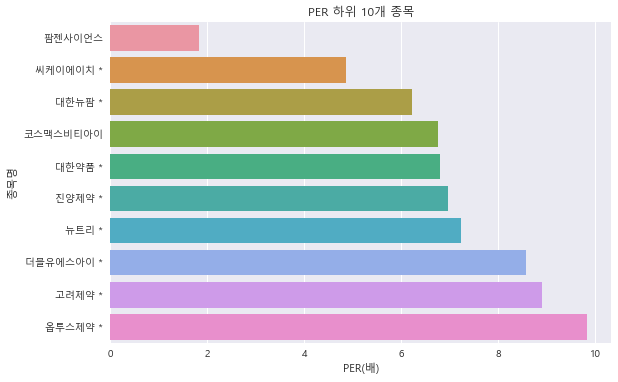

In [72]:
# PER(배) 가 낮은 하위 10개 종목을 막대그래프로 시각화 합니다.
sns.barplot(data=per_low, x="PER(배)", y="종목명", ci=None).set_title("PER 하위 10개 종목")

<AxesSubplot:ylabel='종목명'>

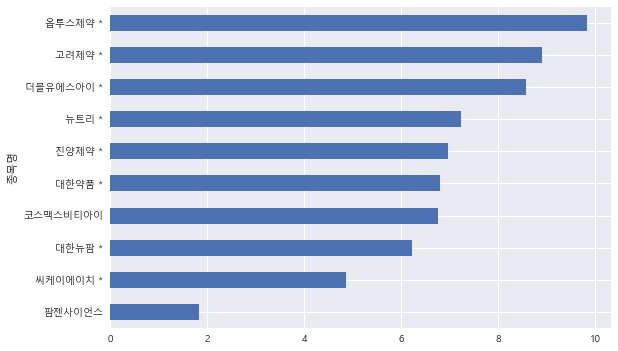

In [78]:
per_low.set_index("종목명")["PER(배)"].plot.barh()

In [81]:
# PER(배) 가 높은 상위 10개 종목을 정렬기능으로 찾습니다.
per_high = df[cols].sort_values(by="PER(배)", ascending=False).head(10)
per_high

,조회일자,종목명,종목코드,52주차액비율,거래대금,거래량,배당수익률(%),목표주가,상장주식수,시가총액(억원),시가총액순위(전처리),투자의견,매수매도,현재-최고가,현재/최고가비율,현재가,PER(배),EPS(원),PBR(배),BPS(원)
14,2022-07-12,부광약품,003000,2.982234,849.0,94223.0,1.11,NaN,71063049,6431,285,NaN,NaN,-14480.0,0.383830,9020.0,3016.67,3.0,2.38,3801.0
54,2022-07-12,JW중외제약2우B,001067,1.571309,0.0,0.0,0.46,35667.0,102927,72,1643,4.0,매수,-3000.0,0.959072,70300.0,360.51,195.0,8.04,8745.0
56,2022-07-12,한올바이오파마,009420,1.822742,174.0,9881.0,NaN,24333.0,52240638,9220,222,4.0,매수,-9600.0,0.647706,17650.0,215.24,82.0,5.79,3049.0
65,2022-07-12,JW중외제약우,001065,1.717333,0.0,5.0,0.96,35667.0,182735,66,1672,4.0,매수,-10711.0,0.773365,36550.0,186.41,195.0,4.16,8745.0
124,2022-07-12,CMG제약 *,058820,2.201717,138.0,52087.0,NaN,NaN,138892244,3639,181,NaN,NaN,-2495.0,0.513645,2635.0,174.67,15.0,1.97,1333.0
30,2022-07-12,에스티팜 *,237690,1.836784,455.0,4722.0,0.53,141111.0,18808775,17850,16,4.0,매수,-54300.0,0.639920,96500.0,173.18,548.0,5.67,16744.0
29,2022-07-12,한독,002390,1.721713,5.0,282.0,1.99,NaN,13763533,2422,514,NaN,NaN,-10050.0,0.642984,18100.0,139.68,126.0,0.66,26515.0
36,2022-07-12,JW중외제약,001060,1.752747,43.0,1781.0,1.31,35667.0,22178081,5345,311,4.0,매수,-7650.0,0.760188,24250.0,123.59,195.0,2.76,8745.0
60,2022-07-12,휴온스글로벌 *,084110,3.717481,24.0,1110.0,2.20,NaN,12621492,2739,269,NaN,NaN,-50555.0,0.300809,21750.0,120.56,180.0,0.50,43696.0
119,2022-07-12,진바이오텍 *,086060,1.753262,31.0,6459.0,NaN,NaN,8610587,403,1401,NaN,NaN,-2600.0,0.648173,4790.0,120.13,39.0,0.91,5124.0


In [82]:
per_high.set_index("종목명")["PER(배)"].sort_values()

종목명
진바이오텍 *       120.13
휴온스글로벌 *      120.56
JW중외제약        123.59
한독            139.68
에스티팜 *        173.18
CMG제약 *       174.67
JW중외제약우       186.41
한올바이오파마       215.24
JW중외제약2우B     360.51
부광약품         3016.67
Name: PER(배), dtype: float64

<AxesSubplot:ylabel='종목명'>

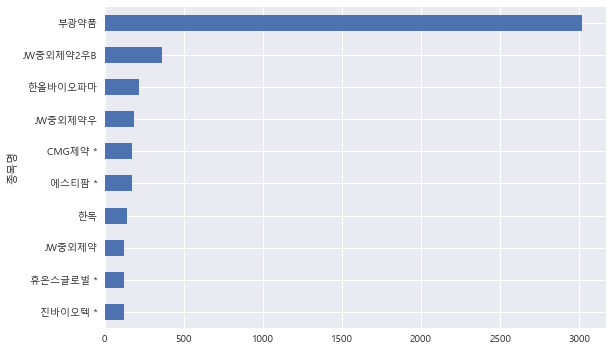

In [83]:
# per_high 변수에 담긴 "종목명", "PER(배)" 컬럼을 가져와 막대그래프로 시각화 합니다.
per_high.set_index("종목명")["PER(배)"].sort_values().plot.barh()

Text(0.5, 1.0, 'PER 상위 10개 종목')

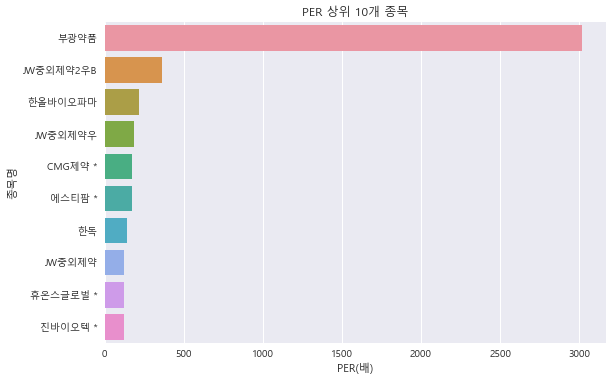

In [84]:
sns.barplot(data=per_high, x="PER(배)", y="종목명", ci=None).set_title("PER 상위 10개 종목")

## PBR 상하위 10개 종목 찾기


* `PBR = 주가/BPS(주당순자산가치)`
* PBR(주가순자산비율, price-to-book ratio, P/B ratio)

In [86]:
# PBR(배) 가 낮은 하위 10개 종목을 찾습니다.
pbr_low = df[cols].sort_values(by="PBR(배)").head(10)
pbr_low

,조회일자,종목명,종목코드,52주차액비율,거래대금,거래량,배당수익률(%),목표주가,상장주식수,시가총액(억원),시가총액순위(전처리),투자의견,매수매도,현재-최고가,현재/최고가비율,현재가,PER(배),EPS(원),PBR(배),BPS(원)
81,2022-07-12,씨케이에이치 *,900120,2.119048,16.0,63334.0,NaN,NaN,123012232,311,1458,NaN,NaN,-191.0,0.570787,254.0,4.87,52.0,0.08,3296.0
83,2022-07-12,코스맥스비티아이,044820,2.186813,2.0,312.0,2.82,NaN,9603921,885,857,NaN,NaN,-10400.0,0.477387,9500.0,6.75,1365.0,0.28,32816.0
64,2022-07-12,일성신약,003120,1.307692,0.0,2.0,0.98,NaN,2660000,2038,577,NaN,NaN,-12900.0,0.856826,77200.0,42.37,1808.0,0.33,229136.0
110,2022-07-12,에이프로젠 H&G *,109960,2.404255,3.0,4801.0,NaN,NaN,178695217,933,882,NaN,NaN,-607.0,0.462832,523.0,23.73,22.0,0.42,1248.0
121,2022-07-12,제일파마홀딩스,002620,2.357143,8.0,710.0,0.53,NaN,15973355,1957,590,NaN,NaN,-12250.0,0.505051,12500.0,NaN,-411.0,0.46,26587.0
47,2022-07-12,에이프로젠제약,003060,2.619962,33.0,54592.0,NaN,NaN,398575882,2427,513,NaN,NaN,-750.0,0.450549,615.0,26.48,23.0,0.48,1279.0
60,2022-07-12,휴온스글로벌 *,084110,3.717481,24.0,1110.0,2.20,NaN,12621492,2739,269,NaN,NaN,-50555.0,0.300809,21750.0,120.56,180.0,0.50,43696.0
138,2022-07-12,삼아제약 *,009300,2.022388,9.0,632.0,1.69,NaN,6370000,943,877,NaN,NaN,-12350.0,0.544280,14750.0,13.47,1099.0,0.52,28486.0
107,2022-07-12,광동제약,009290,1.712803,18.0,2899.0,1.56,NaN,52420851,3365,420,NaN,NaN,-3490.0,0.647475,6410.0,13.21,486.0,0.52,12248.0
91,2022-07-12,종근당홀딩스,001630,1.961679,8.0,158.0,2.45,NaN,5009861,2861,463,NaN,NaN,-51200.0,0.523721,56300.0,22.69,2516.0,0.53,108546.0


In [87]:
pbr_low.set_index("종목명")["PBR(배)"]

종목명
씨케이에이치 *       0.08
코스맥스비티아이       0.28
일성신약           0.33
에이프로젠 H&G *    0.42
제일파마홀딩스        0.46
에이프로젠제약        0.48
휴온스글로벌 *       0.50
삼아제약 *         0.52
광동제약           0.52
종근당홀딩스         0.53
Name: PBR(배), dtype: float64

<AxesSubplot:ylabel='종목명'>

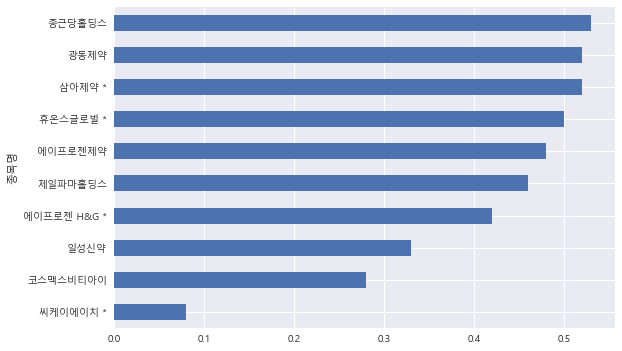

In [88]:
pbr_low.set_index("종목명")["PBR(배)"].plot.barh()

Text(0.5, 1.0, 'PBR 하위 10개 종목')

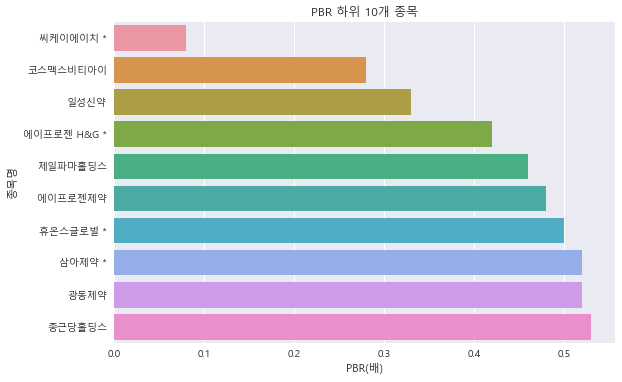

In [90]:
sns.barplot(data=pbr_low, x="PBR(배)", y="종목명", ci=None).set_title("PBR 하위 10개 종목")

In [92]:
# PBR(배) 가 높은 상위 10개 종목을 찾습니다.
pbr_high = df[cols].sort_values(by="PBR(배)", ascending=False).head(10)

<AxesSubplot:ylabel='종목명'>

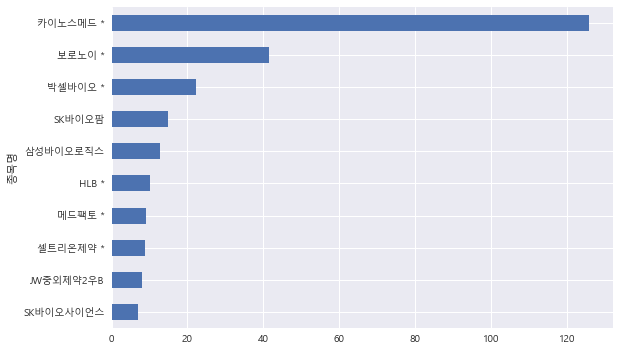

In [96]:
pbr_high.set_index("종목명")["PBR(배)"].sort_values().plot.barh()

Text(0.5, 1.0, 'PBR 상위 10개 종목')

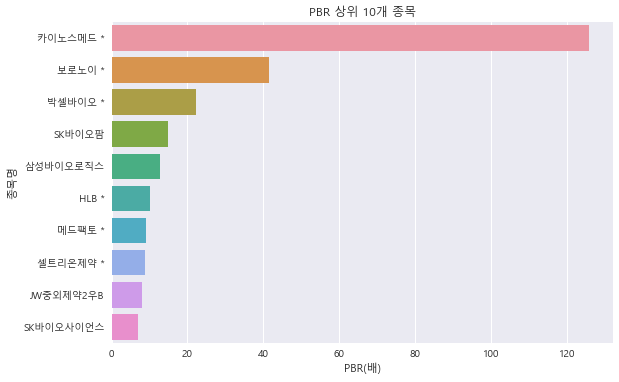

In [95]:
sns.barplot(data=pbr_high, x="PBR(배)", y="종목명", ci=None).set_title("PBR 상위 10개 종목")

## PER 와 PBR의 상관 분석

### 상관 분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 <font color="red">두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다.</font> 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width=500>

* 출처 :  https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98


* PER : 주가수익률, Price Earnings Ratio
* PBR : 주가순자산비율, price-to-book ratio, P/B ratio

In [97]:
#  PER와 PBR의 상관계수를 구합니다.
df[["PER(배)", "PBR(배)"]].corr()

,PER(배),PBR(배)
PER(배),1.000000,0.104105
PBR(배),0.104105,1.000000


<AxesSubplot:xlabel='PBR(배)', ylabel='PER(배)'>

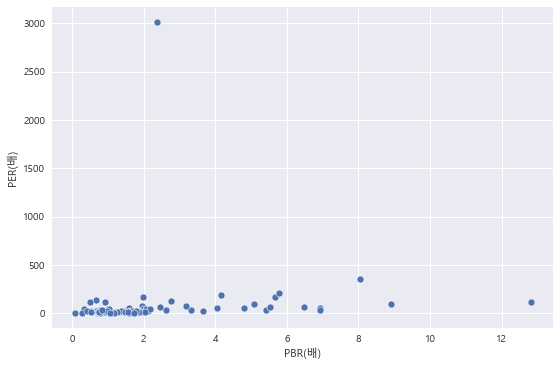

In [98]:
# scatterplot 을 통해 PER와 PBR이 선형성이 있는지 봅니다.
sns.scatterplot(data=df, y="PER(배)", x="PBR(배)")

<AxesSubplot:xlabel='PBR(배)', ylabel='PER(배)'>

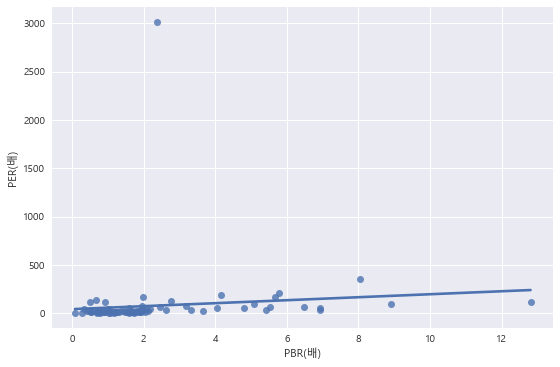

In [99]:
# regplot 을 통해 PER와 PBR이 선형성이 있는지 봅니다.
sns.regplot(data=df, y="PER(배)", x="PBR(배)", ci=None)

### 이상치 찾기

In [100]:
# "PER(배)"의 이상치를 찾습니다.
df["PER(배)"].describe()

count      88.000000
mean       77.829659
std       321.761602
min         1.840000
25%        13.515000
50%        22.585000
75%        49.742500
max      3016.670000
Name: PER(배), dtype: float64

In [101]:
df.loc[df["PER(배)"] > 200, cols]

,조회일자,종목명,종목코드,52주차액비율,거래대금,거래량,배당수익률(%),목표주가,상장주식수,시가총액(억원),시가총액순위(전처리),투자의견,매수매도,현재-최고가,현재/최고가비율,현재가,PER(배),EPS(원),PBR(배),BPS(원)
14,2022-07-12,부광약품,003000,2.982234,849.0,94223.0,1.11,NaN,71063049,6431,285,NaN,NaN,-14480.0,0.383830,9020.0,3016.67,3.0,2.38,3801.0
54,2022-07-12,JW중외제약2우B,001067,1.571309,0.0,0.0,0.46,35667.0,102927,72,1643,4.0,매수,-3000.0,0.959072,70300.0,360.51,195.0,8.04,8745.0
56,2022-07-12,한올바이오파마,009420,1.822742,174.0,9881.0,NaN,24333.0,52240638,9220,222,4.0,매수,-9600.0,0.647706,17650.0,215.24,82.0,5.79,3049.0


In [103]:
# "PBR(배)"의 이상치를 찾습니다.
df.loc[df["PBR(배)"] > 20, cols]

,조회일자,종목명,종목코드,52주차액비율,거래대금,거래량,배당수익률(%),목표주가,상장주식수,시가총액(억원),시가총액순위(전처리),투자의견,매수매도,현재-최고가,현재/최고가비율,현재가,PER(배),EPS(원),PBR(배),BPS(원)
0,2022-07-12,카이노스메드 *,284620,2.492757,1413.0,125641.0,NaN,NaN,22322396,2219,362,NaN,NaN,-10060.0,0.532311,11450.0,NaN,-770.0,125.82,79.0
76,2022-07-12,보로노이 *,310210,1.807560,3664.0,80371.0,NaN,NaN,12638949,5511,108,NaN,NaN,-7250.0,0.862167,45350.0,NaN,NaN,41.56,1049.0
141,2022-07-12,박셀바이오 *,323990,3.234646,588.0,14319.0,NaN,NaN,15223000,6295,89,NaN,NaN,-61800.0,0.398247,40900.0,NaN,-373.0,22.16,1866.0


## 배당수익률이 높은 종목을 찾기

In [120]:
# 배당수익률% 컬럼이 결측치가 아닌 데이터 중 배당수익률% 가 높은 종목을 찾습니다.
# fil = df["배당수익률(%)"].notna()
# df[fil].sort_values(by="배당수익률(%)", ascending=False)
배당수익률 = df[df["배당수익률(%)"].notnull()].sort_values(by='배당수익률(%)', ascending=False).head(10)

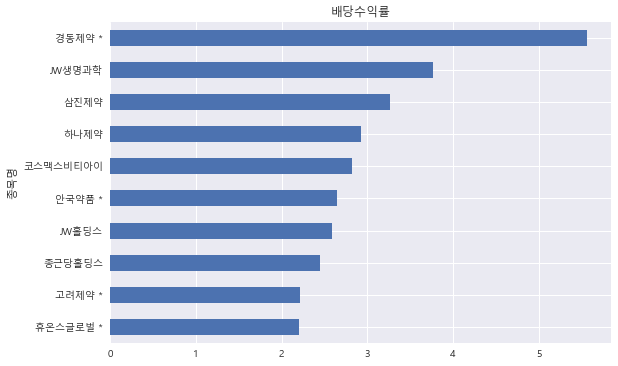

In [123]:
# 위에서 구한 배당수익률이 높은 종목이 상단에 위치하도록 막대그래프로 시각화 합니다.
# set_index(기준 축이 될 컬럼명으로 인덱스로 만들어 줍니다.)
# sort_values(특정 컬럼 기준으로 순차정렬합니다.)
g = 배당수익률.set_index("종목명")["배당수익률(%)"].sort_values().plot.barh(title="배당수익률")

## 코스피에서 해당 업종/테마의 시가총액이 가장 많은 종목을 찾아주세요.

In [134]:
# 코스피에 해당 여부를 인덱싱 합니다.
kospi = df['코스피/코스닥'] == '코스피'

In [137]:
# 코스피중에서 시가총액(억원) 상위 20개 종목을 찾습니다.
시가총액 = df[kospi].sort_values(by="시가총액(억원)", ascending=False).head(20)

<AxesSubplot:title={'center':'시가총액'}, ylabel='종목명'>

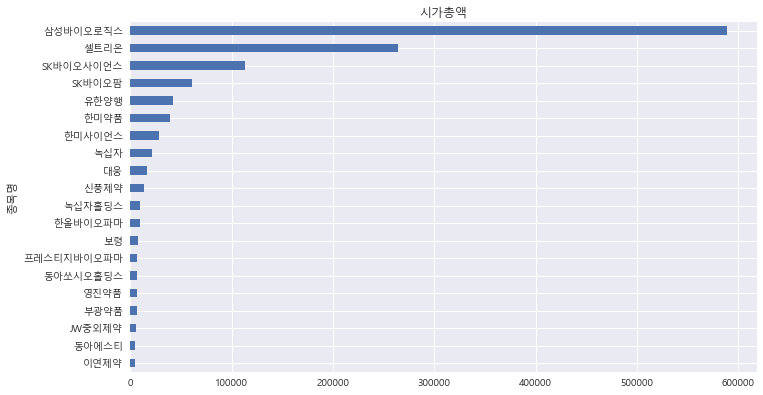

In [140]:
시가총액.set_index("종목명")["시가총액(억원)"].sort_values().plot.barh(
    figsize=(10, 6), title="시가총액")

## 코스피에서 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.

In [159]:
# 거래량 column으로 sorting을 해보면 확인할 수 있습니다.
# 거래량을 볼 때는 가격을 함께 참고해 보세요.
거래량 = df[kospi].sort_values(by="거래량", ascending=False).head(20)

<AxesSubplot:title={'center':'거래량'}, ylabel='종목명'>

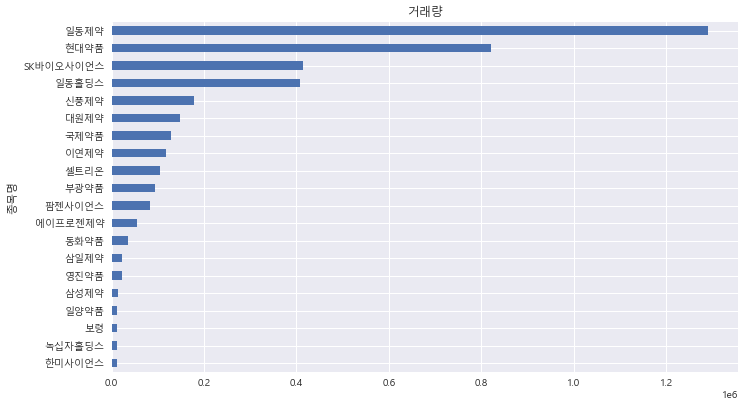

In [160]:
거래량.set_index("종목명")["거래량"].sort_values().plot.barh(
    figsize=(10, 6), title="거래량")

## 코스피 해당 업종/테마 종목 중 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?

In [163]:
# df["현재/최고가비율"] = df["현재가"] / df["52주최고"]
# 현재/최고가비율 을 정렬합니다.
# 현재/최고가비율이 낮은 순으로 손실이 크게 난 종목을 찾아봅니다.
down_top = df[kospi].sort_values(by="현재/최고가비율")[["종목명", "현재/최고가비율"]].head(20)
down_top

,종목명,현재/최고가비율
63,프레스티지바이오파마,0.290086
17,신풍제약,0.329114
12,이연제약,0.355479
4,신풍제약우,0.360000
14,부광약품,0.383830
16,유나이티드제약,0.386435
39,SK바이오사이언스,0.406077
126,삼성제약,0.425599
47,에이프로젠제약,0.450549
92,녹십자,0.454774


<AxesSubplot:title={'center':'현재/최고가 비율'}, ylabel='종목명'>

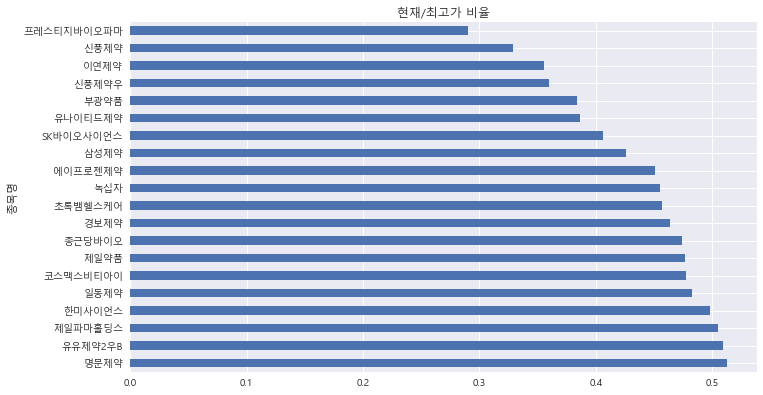

In [165]:
# 현재/최고가비율로 손실이 큰 순서대로 막대그래프로 시각화 합니다.
down_top.set_index("종목명")["현재/최고가비율"].sort_values(ascending=False).plot.barh(
    figsize=(10, 6), title="현재/최고가 비율")

Text(0.5, 1.0, '현재/최고가 비율')

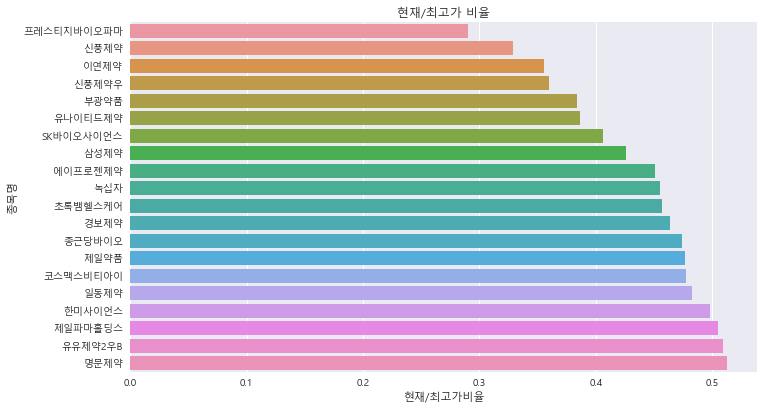

In [168]:
plt.figure(figsize = (10, 6))
sns.barplot(data=down_top, x="현재/최고가비율", y="종목명", ci=None).set_title("현재/최고가 비율")

## 코스피 해당 업종/테마 종목 중 최근 52주 차액 비율이 가장 높은 종목은 무엇일까요?

In [ ]:
# df["52주차액비율"] = df["52주최고"] / df["52주최저"]
# "52주차액비율"이 높은 순으로 정렬합니다.


In [ ]:
# 종목명에 대한 52주차액비율을 시각화 합니다.  



### 손실 낙폭(Drawdown)
거래 계좌 또는 펀드의 특정 기간 동안 최고치에서 최저치까지 감소하는 것입니다. 드로 다운은 일반적으로 최고점과 후속 최저점 사이의 백분율로 표시됩니다.

드로 다운은 다른 투자의 역사적 위험을 측정하고 펀드 성과를 비교하거나 개인 거래 성과를 모니터링하는 데 중요합니다.
* 드로 다운은 투자 또는 거래 계정이 최고점으로 회복되기 전에 최고점에서 얼마나 하락했는지를 나타냅니다.
* 하락은 하락 변동성의 척도입니다.
* 드로 다운을 평가할 때 드로 다운을 복구하는 데 걸리는 시간도 고려해야합니다.
* 감소와 손실이 반드시 같은 것은 아닙니다.
* 대부분의 거래자들은 하락을 최고점에서 최저점으로 보는 반면, 손실은 일반적으로 현재 또는 종료 가격과 관련된 구매 가격을 나타냅니다.

* 참고 : https://www.investopedia.com/terms/d/drawdown.asp

### 최대 손실 낙폭 (MDD: Maximum Drawdown)

* 새로운 최고점에 도달하기 전에 포트폴리오의 최고점에서 최저점까지 관찰 된 최대 손실입니다. 최대 손실은 지정된 기간 동안의 하락 위험을 나타내는 지표입니다.
* MDD (Maximum drawdown)는 최고점에서 최저점까지 자산의 최대 가격 하락을 측정 한 것입니다.
* 최대 하락은 하락 위험의 지표로 간주되며 큰 MDD는 하락 움직임이 변동성이있을 수 있음을 시사합니다.
* MDD는 가장 큰 손실을 측정하지만 손실의 빈도는 고려하지 않으며 이익의 크기는 고려하지 않습니다.

```
MDD = (저점값 - 고점값) / 고점값
```

* 참고 : https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp

* 더 읽어보기 : [가상화폐 투자 마법 공식(5) - MDD(최대 낙폭) 에 대한 고찰 — Steemit](https://steemit.com/kr/@kangcfa/5-mdd)

### 최대 손실 낙폭(MDD)이 큰 종목 순으로 찾아주세요.

In [ ]:
# MDD 값을 구하고 MDD 값으로 정렬합니다.
# df["MDD"]

## 코스피 해당 업종/테마에서 거래대금이 20위 안에 있는 코스피 종목 중에 "PER(배)"가 가장 높은 종목은 무엇일까요?

In [ ]:
# 거래대금 상위 20위 목록을 찾고
# PER(배)가 높은 순으로 정렬합니다.
# kospi_20
# kospi_20_per


In [ ]:
# kospi_20_per 변수에서 "종목명", "거래대금", "PER(배)" 만 따로 봅니다.


## 코스피 해당 업종/테마에서 거래대금이 20위 안에 있는 코스피 종목 중에 "PER(배)"가 가장 낮은 종목은 무엇일까요?

In [ ]:
# 거래대금 상위 20개에 대한 데이터를 코스피거래대금 DataFrame에 할당합니다.
# PER(배)가 낮은 순으로 정렬해 주세요.
# kospi_20_per_low

## 전체 변수에 대한 상관계수 구하기

In [ ]:
# 데이터가 row 방향이나 column방향으로 모두 결측치일 경우 그 row나 colmun을 지우고,
# corr()를 통해 column들 간의 상관계수를 구합니다.
# kospi_corr

### 상관계수 시각화

In [ ]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 만듭니다.

# 수식적으로 어려워 보일수도 있지만 간단합니다.
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있습니다.
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있습니다.
# mask

In [ ]:
# 대비되는 표현을 하고자 할 때는 seismic cmap을 사용하면 좋습니다.


In [ ]:
# matplotlib의 pyplot에서 사용할 수 있는 컬러맵을 찾아봅니다.
# print(plt.colormaps())

## 종목별 상관계수 구하기
* 특정 일자의 주가를 통해 구하는 상관계수 입니다.
* 장기간의 데이터를 사용하거나 다른 변수를 추가해서 사용하게 되면 좀 더 의미있는 상관계수를 구할 수 있습니다.
* <font color="red">상관 계수 수치는 인과 관계와는 무관합니다.</font>

In [ ]:
# 종목명과 수치형 데이터 column들로 list작성합니다.
# df_nums 
# df.dtypes[df.dtypes != object]


In [ ]:
# df_nums 에 종목명을 추가합니다.


In [ ]:
# 종목명을 인덱스로 설정하고 다시 transpose를 하면 종목명이 컬럼으로 오게 됩니다.
# df_item

In [ ]:
# set_index로 종목명 column으로 만들고,
# trainpose(T)로 종목명 column 안에 있던 각각 종목명들이 개별 변수 컬럼으로 변경됩니다.
# corr()로 각 변수들간의 상관 계수를 구합니다.
# df_item_corr

In [ ]:
# df_item_corr

In [ ]:
# 특정 주가와 상관관계가 높은 순으로 내림차순으로 정렬합니다.


* 실습결과에 다른 테마를 적용해 보면 같은 방식으로 여러 테마를 분석해 보실 수 있습니다.